# Amelia's Single-cell experiment - plotting

## Load in libraries

In [1]:
import tools
import scanpy as sc

sc.logging.print_header()

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/homebrew/Caskroom/mambaforg

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.24.4 scipy==1.11.2 pandas==2.1.0 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10


/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


## Read in the files

We will try to get rid of non-T cells and attempt a simple annotation.

In [2]:
adata = sc.read_h5ad("write/adata_with_tcr_tnk.h5ad")
try:
    adata.uns.pop("log1p")  # why do i have to do this?
except:
    pass
adata

AnnData object with n_obs × n_vars = 5546 × 2558
    obs: 'sample_id', 'sample_num', 'group', 'tissue', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ig', 'pct_counts_ig', 'leiden', 'filter_rna', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_abT_VDJ_main', 'd_call_ab

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/Caskroom/mambaforge/base/e

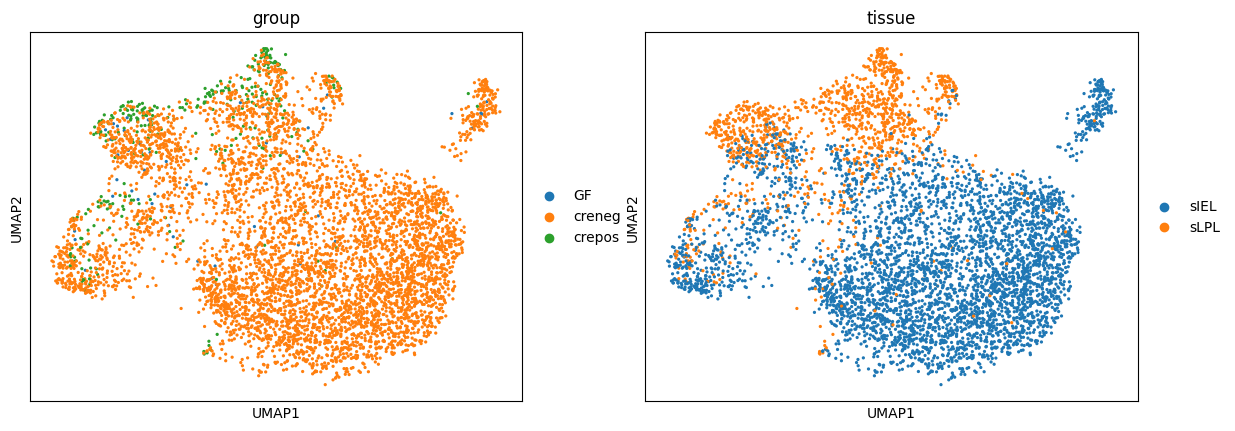

In [3]:
sc.pl.umap(adata, color=["group", "tissue"])

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:169: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'.

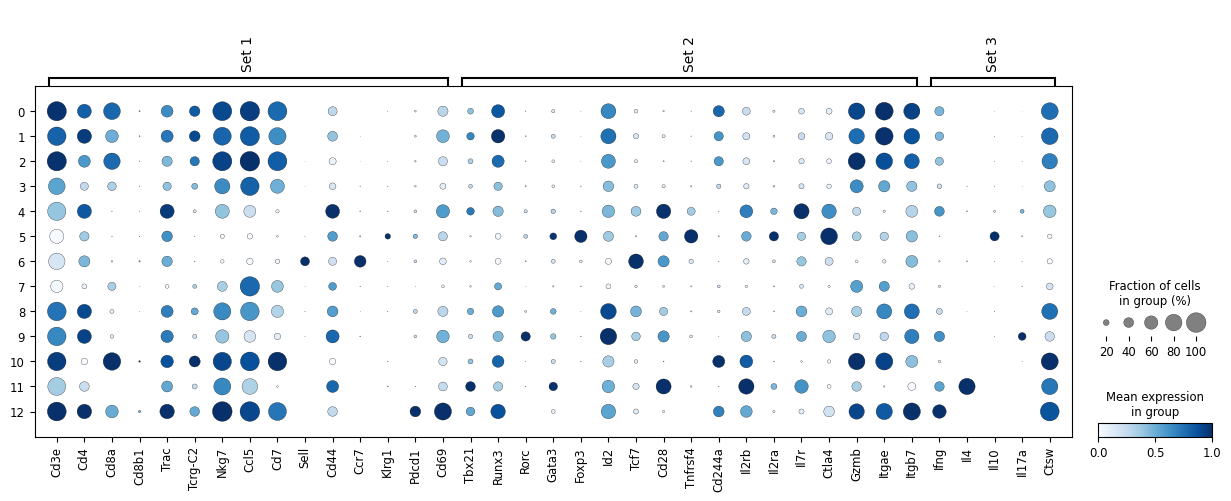

In [4]:
sc.pl.dotplot(
    adata,
    {
        "Set 1": [
            "Cd3e",
            "Cd4",
            "Cd8a",
            "Cd8b1",
            "Trac",
            "Tcrg-C2",
            "Nkg7",
            "Ccl5",
            "Cd7",
            "Sell",
            "Cd44",
            "Ccr7",
            "Klrg1",
            "Pdcd1",
            "Cd69",
        ],
        "Set 2": [
            "Tbx21",
            "Runx3",
            "Rorc",
            "Gata3",
            "Foxp3",
            "Id2",
            "Tcf7",
            "Cd28",
            "Tnfrsf4",
            "Cd244a",
            "Il2rb",
            "Il2ra",
            "Il7r",
            "Ctla4",
            "Gzmb",
            "Itgae",
            "Itgb7",
        ],
        "Set 3": [
            "Ifng",
            # "Il2",
            "Il4",
            # "Il5",
            "Il10",
            # "Il13",
            "Il17a",
            # "Il17f",
            # "Tgfb1",
            "Ctsw",
        ],
    },
    groupby="leiden_T",
    standard_scale="var",
    color_map="Blues",
    save="leiden_T_markers.pdf",
)

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/anndata/_core/anndata.py:1105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:169: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior o

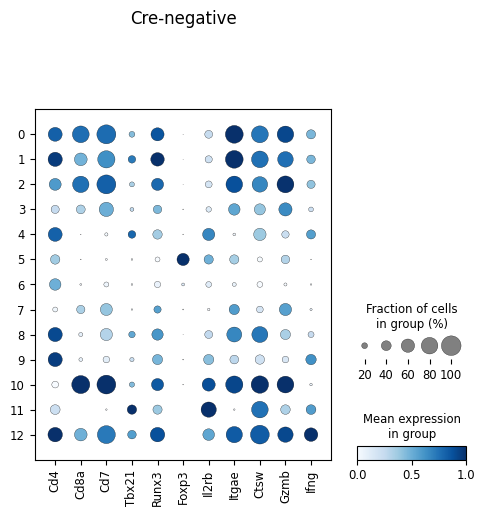

In [5]:
sc.pl.dotplot(
    adata[adata.obs["group"] == "creneg"],
    [
        "Cd4",
        "Cd8a",
        "Cd7",
        "Tbx21",
        "Runx3",
        "Foxp3",
        "Il2rb",
        "Itgae",
        "Ctsw",
        "Gzmb",
        "Ifng",
    ],
    groupby="leiden_T",
    standard_scale="var",
    color_map="Blues",
    save="cre_neg_leiden_T_markers.pdf",
    title="Cre-negative",
)

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/anndata/_core/anndata.py:1105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:169: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior o

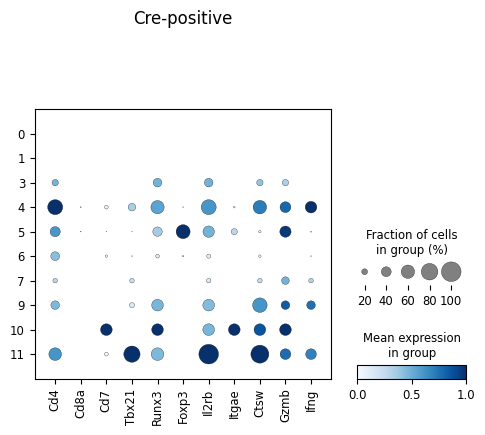

In [6]:
sc.pl.dotplot(
    adata[adata.obs["group"] == "crepos"],
    [
        "Cd4",
        "Cd8a",
        "Cd7",
        "Tbx21",
        "Runx3",
        "Foxp3",
        "Il2rb",
        "Itgae",
        "Ctsw",
        "Gzmb",
        "Ifng",
    ],
    groupby="leiden_T",
    standard_scale="var",
    color_map="Blues",
    save="cre_pos_leiden_T_markers.pdf",
    title="Cre-positive",
)

In [7]:
cell_dict = {
    "0": "dpIEL",
    "1": "pre-dpIEL",
    "2": "dpIEL",
    "3": "Innate IEL",
    "4": "Teff",
    "5": "Treg",
    "6": "Tcm",
    "7": "Innate IEL",
    "8": "pre-dpIEL",
    "9": "Teff",
    "10": "Unconv IEL",
    "11": "Tem",
    "12": "RACTL",
}

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


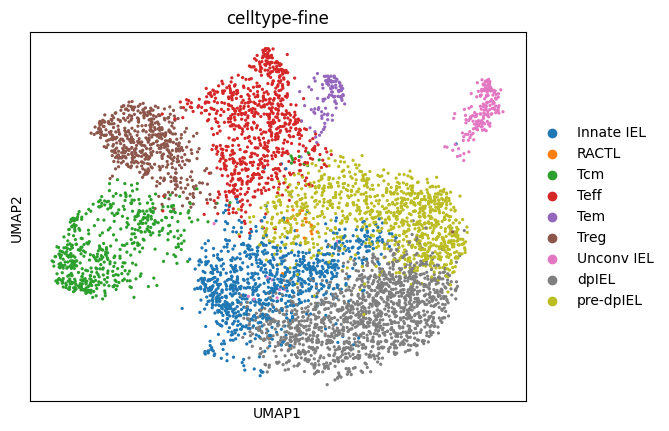

In [8]:
adata.obs["celltype-fine"] = adata.obs["leiden_T"].map(cell_dict)
sc.pl.umap(adata, color="celltype-fine")

In [9]:
adata.write_h5ad("write/adata_with_tcr_tnk_300823.h5ad", compression="gzip")

In [1]:
import scanpy as sc

adata = sc.read_h5ad("write/adata_with_tcr_tnk_300823.h5ad")

In [2]:
adata.uns["celltype-fine_colors"]

array(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
       '#e377c2', '#7f7f7f', '#bcbd22'], dtype=object)

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


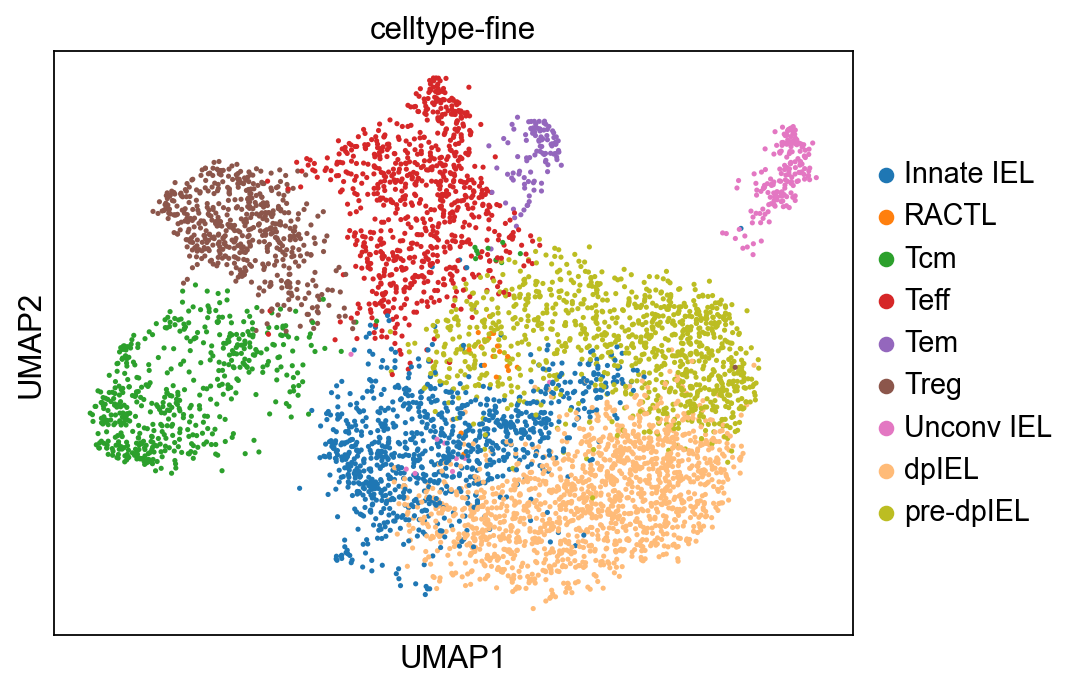

In [3]:
sc.set_figure_params(dpi_save=900, vector_friendly=True, figsize=(6.4, 4.8))

sc.pl.umap(
    adata,
    color="celltype-fine",
    palette=[
        "#1f77b4",
        "#ff7f0e",
        "#2ca02c",
        "#d62728",
        "#9467bd",
        "#8c564b",
        "#e377c2",
        "#ffbb78",
        "#bcbd22",
    ],
    save="dpt_celltype-fine_300823.pdf",
)

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


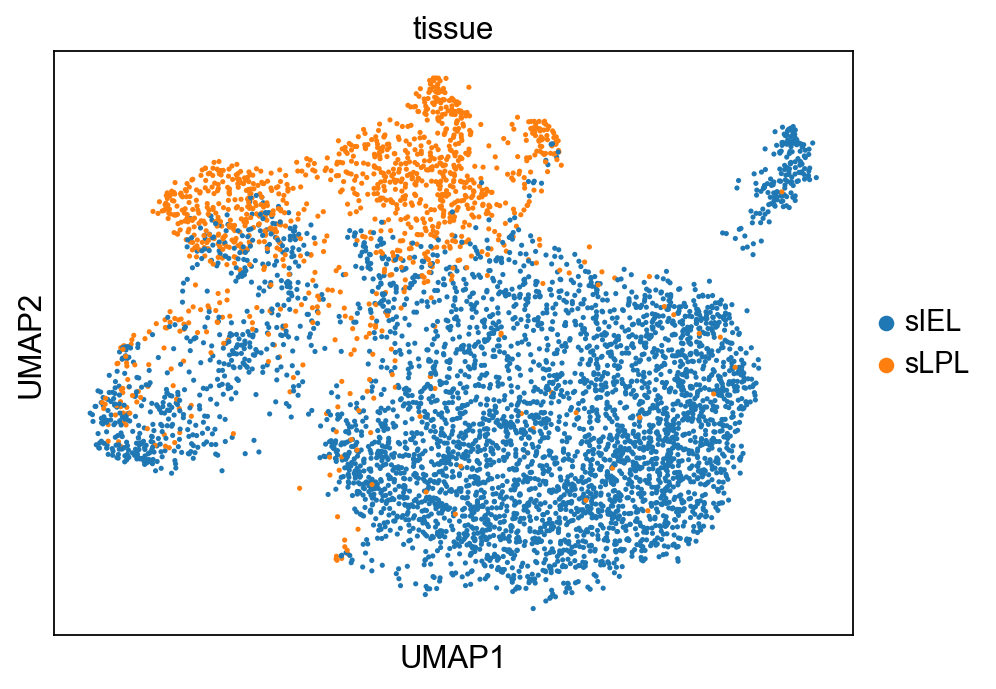

In [4]:
sc.pl.umap(adata, color="tissue", save="dpt_tissue_300823.pdf")

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


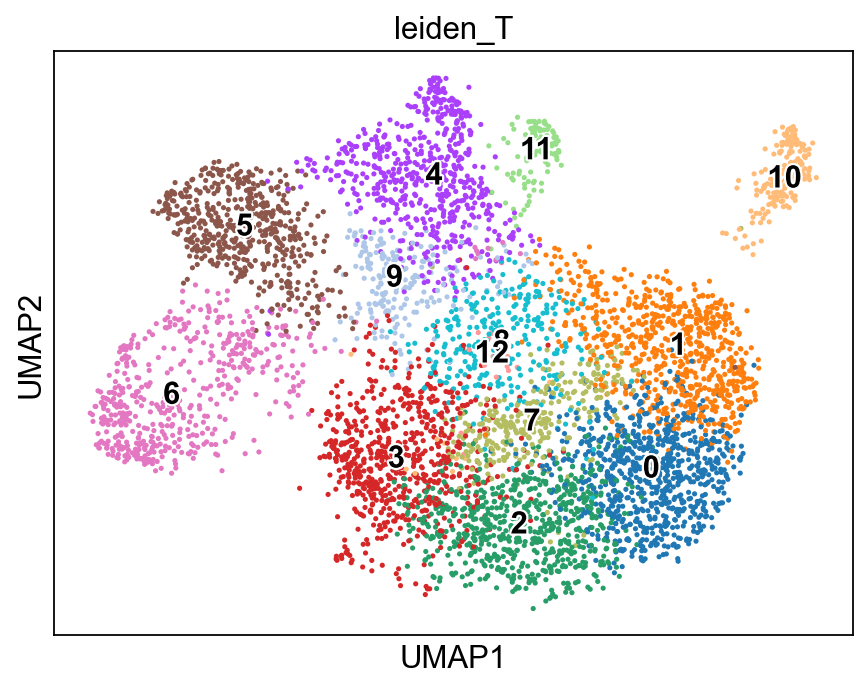

In [5]:
sc.pl.umap(
    adata,
    color="leiden_T",
    save="dpt_leiden_T_300823.pdf",
    legend_loc="on data",
    legend_fontoutline=2,
)

In [6]:
import dandelion as ddl

vdj = ddl.read_h5ddl("write/tcr_data.h5ddl")
vdj = vdj[vdj.metadata_names.isin(adata.obs_names)].copy()
ddl.tl.find_clones(
    vdj, identity=1, key="junction"
)  # complete CDR3 identity at the nucleotide level
ddl.tl.clone_size(vdj)
ddl.tl.clone_size(vdj, max_size=5)
vdj.update_plus(option="all")
# transfer back to tdata object
ddl.tl.transfer(adata, vdj, overwrite=True)
adata.write_h5ad("write/adata_with_tcr_tnk_300823_with_tcr.h5ad", compression="gzip")
vdj.write_h5ddl("write/tcr_data_cloned_300823.h5ddl")

Finding clones based on abT cell VDJ chains : 100%|██████████| 229/229 [00:00<00:00, 7300.15it/s]
Refining clone assignment based on VJ chain pairing : 100%|██████████| 3746/3746 [00:00<00:00, 840611.14it/s]
/Users/uqztuong/Library/CloudStorage/OneDrive-TheUniversityofQueensland/Documents/GitHub/dandelion/dandelion/utilities/_utilities.py:515: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
/Users/uqztuong/Library/CloudStorage/OneDrive-TheUniversityofQueensland/Documents/GitHub/dandelion/dandelion/utilities/_core.py:1124: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
/Users/uqztuong/Library/CloudStorage/OneDrive-TheUniversityofQueensland/Documents/GitHub/dandelion/dandelion/utilities/_core.py:1124: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
/Users/uqztuo

In [7]:
# subset to just cells with TCR info
tdata = adata[~adata.obs["chain_status"].isin(["No_contig"])].copy()
tdata

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/anndata/_core/anndata.py:1105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


AnnData object with n_obs × n_vars = 3746 × 2558
    obs: 'sample_id', 'sample_num', 'group', 'tissue', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ig', 'pct_counts_ig', 'leiden', 'filter_rna', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_abT_VDJ_main', 'd_call_ab

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


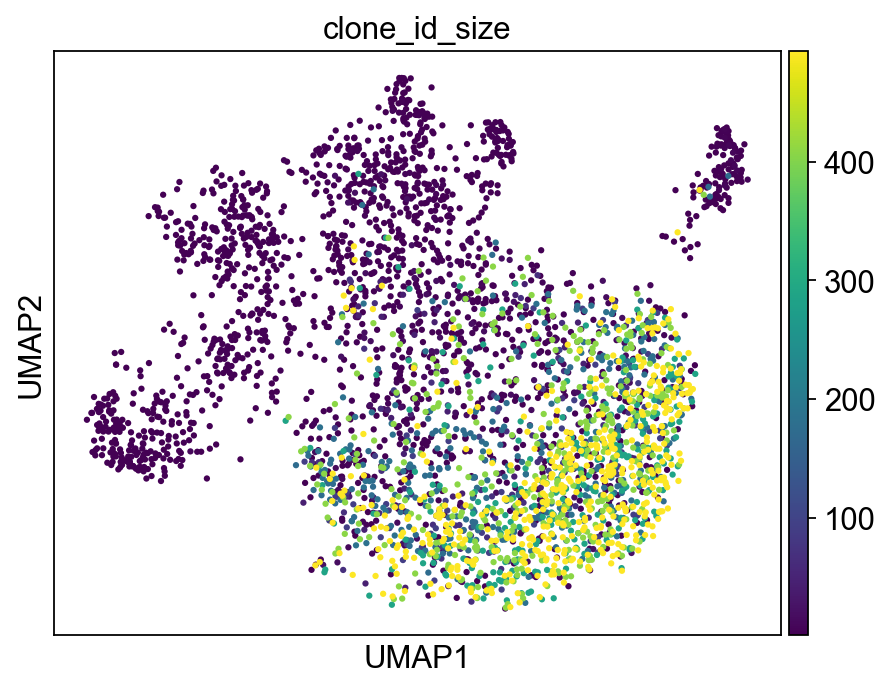

In [8]:
sc.set_figure_params(dpi_save=900, vector_friendly=True, figsize=(6.4, 4.8))

sc.pl.umap(tdata, color="clone_id_size", save="dpt_clone_id_size_300823.pdf")

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


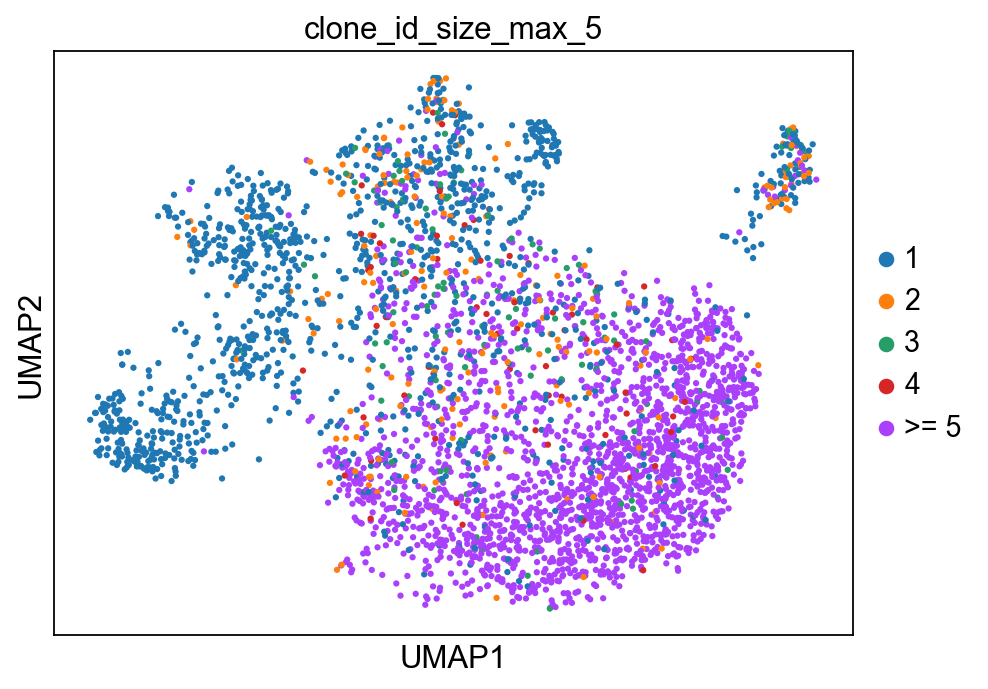

In [9]:
sc.pl.umap(
    tdata, color="clone_id_size_max_5", save="dpt_clone_id_size_max_5_300823.pdf"
)

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


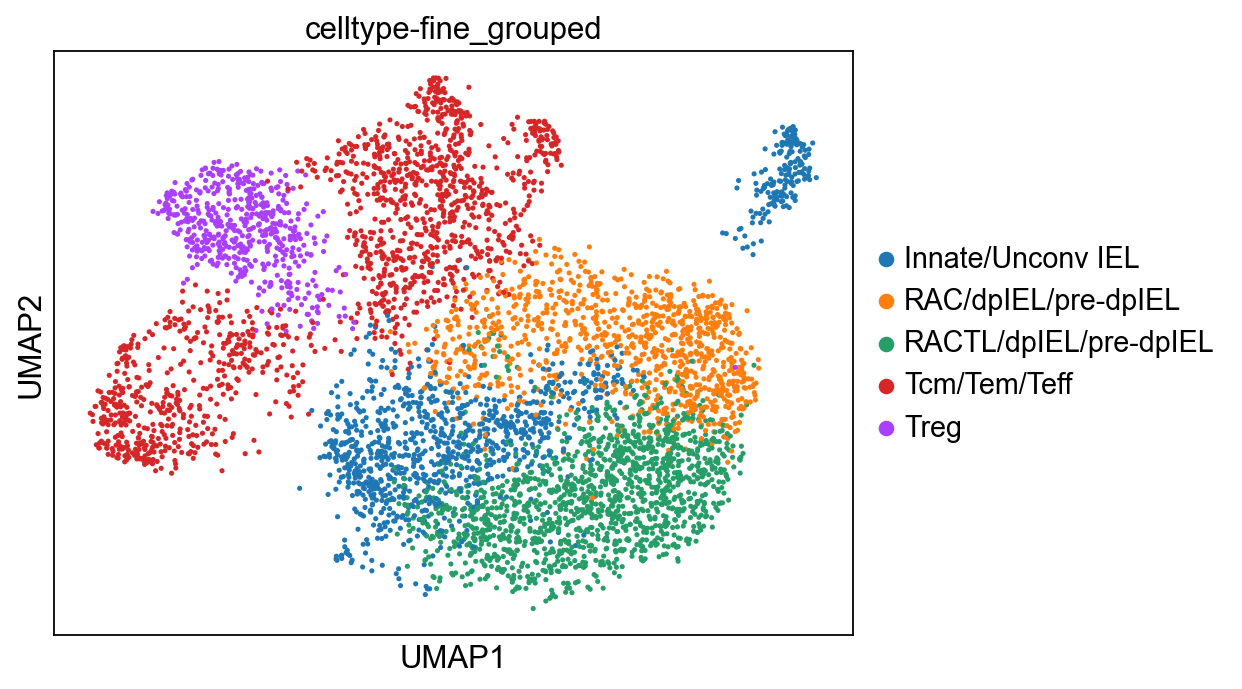

In [10]:
# group RACs, dpIELs & pre-dpIELs; Tcm & Tem; Innate & Unconv IELs to reach 5 major cell types

cell_dict = {
    "dpIEL": "RACTL/dpIEL/pre-dpIEL",
    "RACTL": "RACTL/dpIEL/pre-dpIEL",
    "pre-dpIEL": "RAC/dpIEL/pre-dpIEL",
    "Tcm": "Tcm/Tem/Teff",
    "Tem": "Tcm/Tem/Teff",
    "Teff": "Tcm/Tem/Teff",
    "Innate IEL": "Innate/Unconv IEL",
    "Unconv IEL": "Innate/Unconv IEL",
}

adata.obs["celltype-fine_grouped"] = adata.obs["celltype-fine"]
adata.obs["celltype-fine_grouped"] = [
    cell_dict[x] if x in cell_dict else x for x in adata.obs["celltype-fine_grouped"]
]
sc.pl.umap(
    adata, color="celltype-fine_grouped", save="dpt_celltype-fine_grouped_300823.pdf"
)

In [11]:
adata.write_h5ad("write/adata_with_tcr_tnk_300823_with_tcr.h5ad", compression="gzip")

## Clonal overlap

In [1]:
import dandelion as ddl

ddl.logging.print_header()

dandelion==0.3.3.dev39 pandas==2.1.0 numpy==1.24.4 matplotlib==3.7.1 networkx==3.1 scipy==1.11.2


In [2]:
import scanpy as sc

sc.logging.print_header()

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/pyth

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.24.4 scipy==1.11.2 pandas==2.1.0 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10


/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.


In [3]:
adata = sc.read_h5ad("write/adata_with_tcr_tnk_300823_with_tcr.h5ad")
try:
    adata.uns.pop("log1p")  # why do i have to do this?
except:
    pass
adata

AnnData object with n_obs × n_vars = 5546 × 2558
    obs: 'sample_id', 'sample_num', 'group', 'tissue', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ig', 'pct_counts_ig', 'leiden', 'filter_rna', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_abT_VDJ_main', 'd_call_ab

In [4]:
# create a new column that encompases the group, tissue and celltype-fine
from tools import combine_two_categories

combine_two_categories(adata, "tissue", "celltype-fine_grouped")
combine_two_categories(adata, "group", "celltype-fine_grouped")
combine_two_categories(adata, "group", "tissue_celltype-fine_grouped")

combine_two_categories(adata, "tissue", "celltype-fine")
combine_two_categories(adata, "group", "celltype-fine")
combine_two_categories(adata, "group", "tissue_celltype-fine")

In [5]:
# subset to just cells with TCR info
tdata1 = adata[
    (~adata.obs["chain_status"].isin(["No_contig"]))
    & (adata.obs["group"].isin(["crepos", "creneg"]))
].copy()
tdata1

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/anndata/_core/anndata.py:1105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


AnnData object with n_obs × n_vars = 3735 × 2558
    obs: 'sample_id', 'sample_num', 'group', 'tissue', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ig', 'pct_counts_ig', 'leiden', 'filter_rna', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_abT_VDJ_main', 'd_call_ab

In [6]:
tdata2 = adata[(~adata.obs["chain_status"].isin(["No_contig"]))].copy()
tdata2

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/anndata/_core/anndata.py:1105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


AnnData object with n_obs × n_vars = 3746 × 2558
    obs: 'sample_id', 'sample_num', 'group', 'tissue', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ig', 'pct_counts_ig', 'leiden', 'filter_rna', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_abT_VDJ_main', 'd_call_ab

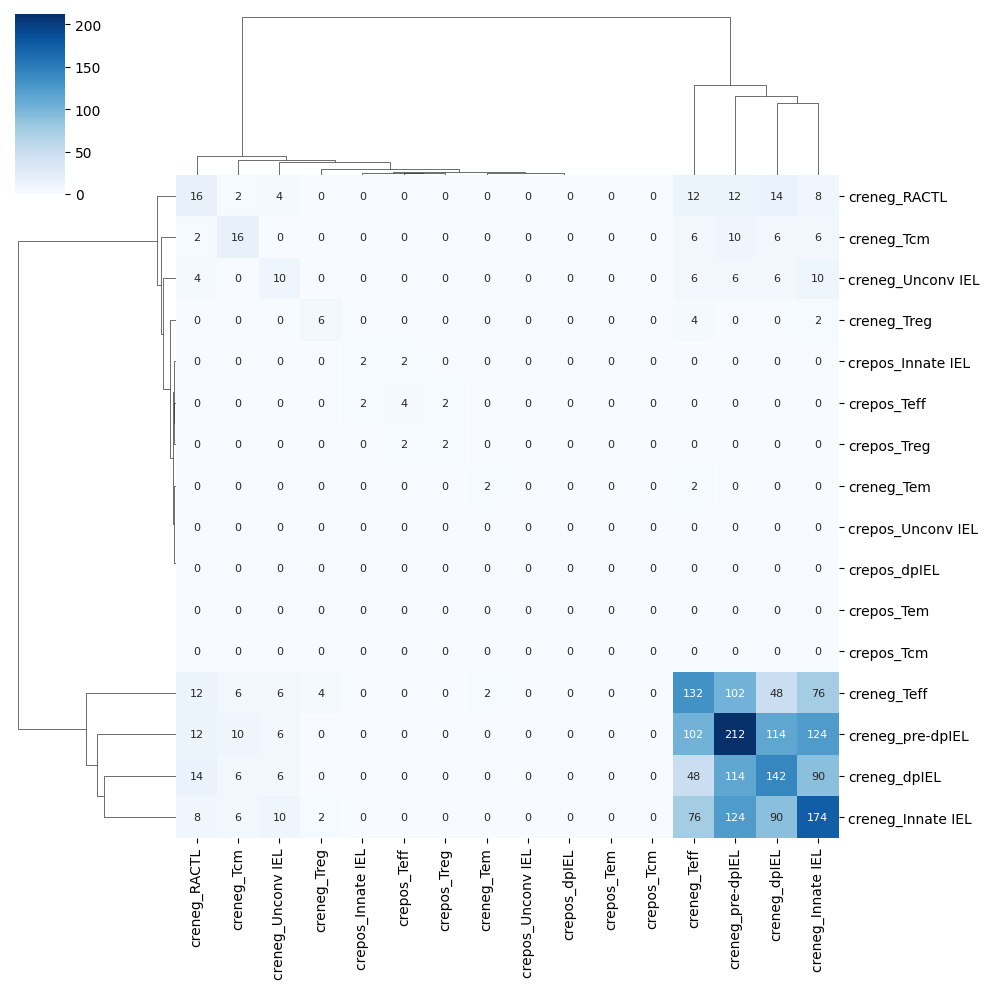

In [7]:
import tools
import matplotlib.pyplot as plt

ddl.tl.clone_overlap(tdata1, groupby="group_celltype-fine")
ddl.pl.clone_overlap(
    tdata1,
    groupby="group_celltype-fine",
    weighted_overlap=True,
    as_heatmap=True,
    cmap="Blues",
    annot=True,
    figsize=(10, 10),
    annot_kws={"size": 8},
    fmt="g",
)
plt.savefig(
    "figures/clonal_overlap_matrix_heatmap_310823.pdf",
)

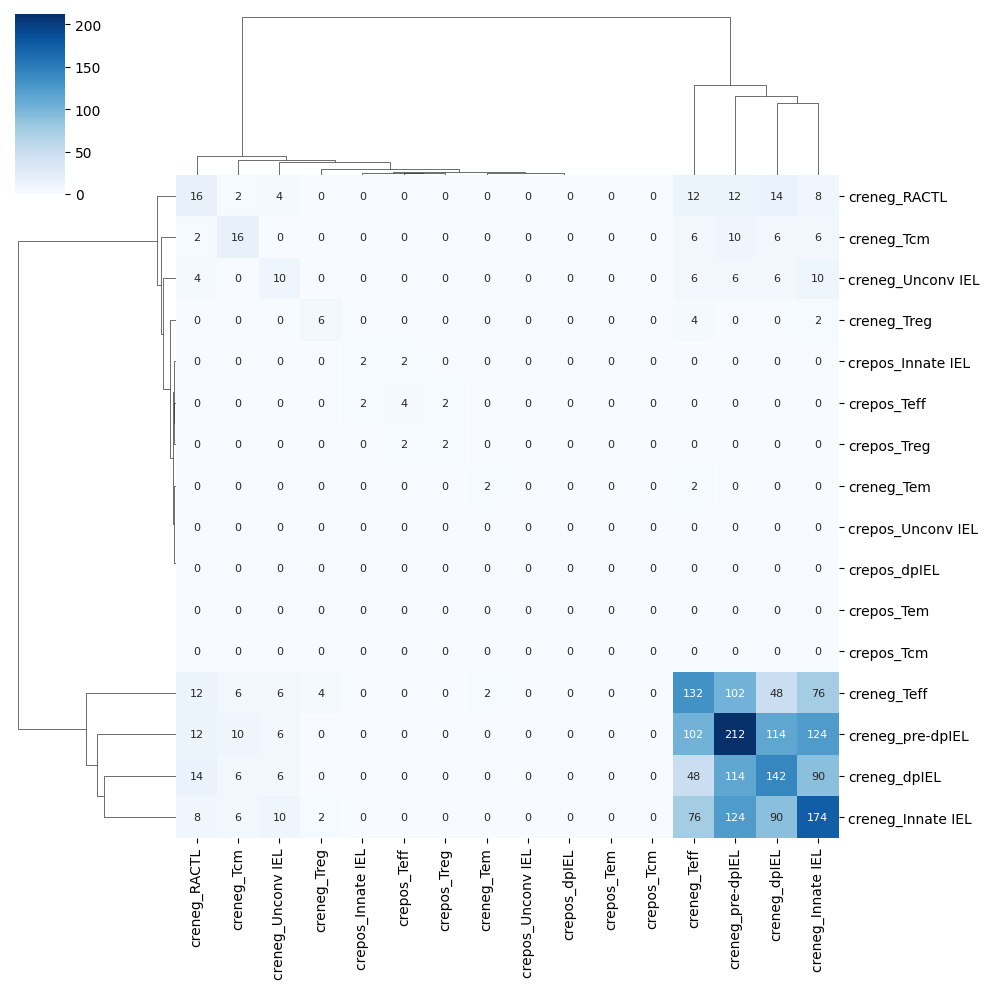

In [8]:
ddl.tl.clone_overlap(tdata1, groupby="group_celltype-fine")
out = ddl.pl.clone_overlap(
    tdata1,
    groupby="group_celltype-fine",
    weighted_overlap=True,
    as_heatmap=True,
    cmap="Blues",
    annot=True,
    figsize=(10, 10),
    annot_kws={"size": 8},
    return_heatmap_data=True,
    fmt="g",
)
out.to_csv("heatmap_numbers.csv")

In [10]:
grps = sorted(list(set(tdata2.obs["group_celltype-fine"])))
grps

['GF_Tcm',
 'GF_Teff',
 'GF_Tem',
 'GF_Treg',
 'GF_Unconv IEL',
 'GF_pre-dpIEL',
 'creneg_Innate IEL',
 'creneg_RACTL',
 'creneg_Tcm',
 'creneg_Teff',
 'creneg_Tem',
 'creneg_Treg',
 'creneg_Unconv IEL',
 'creneg_dpIEL',
 'creneg_pre-dpIEL',
 'crepos_Innate IEL',
 'crepos_Tcm',
 'crepos_Teff',
 'crepos_Tem',
 'crepos_Treg',
 'crepos_Unconv IEL',
 'crepos_dpIEL']

In [11]:
tdata2.obs.group.cat.categories

Index(['GF', 'creneg', 'crepos'], dtype='object')

In [12]:
tdata2.uns["group_colors"]

array(['#1f77b4', '#ff7f0e', '#2ca02c'], dtype=object)

In [13]:
grp_col_dict = dict(zip(tdata2.obs.group.cat.categories, tdata2.uns["group_colors"]))
grp_col_dict

{'GF': '#1f77b4', 'creneg': '#ff7f0e', 'crepos': '#2ca02c'}

In [14]:
grp_col = {g: grp_col_dict[g.split("_")[0]] for g in grps}
grp_col

{'GF_Tcm': '#1f77b4',
 'GF_Teff': '#1f77b4',
 'GF_Tem': '#1f77b4',
 'GF_Treg': '#1f77b4',
 'GF_Unconv IEL': '#1f77b4',
 'GF_pre-dpIEL': '#1f77b4',
 'creneg_Innate IEL': '#ff7f0e',
 'creneg_RACTL': '#ff7f0e',
 'creneg_Tcm': '#ff7f0e',
 'creneg_Teff': '#ff7f0e',
 'creneg_Tem': '#ff7f0e',
 'creneg_Treg': '#ff7f0e',
 'creneg_Unconv IEL': '#ff7f0e',
 'creneg_dpIEL': '#ff7f0e',
 'creneg_pre-dpIEL': '#ff7f0e',
 'crepos_Innate IEL': '#2ca02c',
 'crepos_Tcm': '#2ca02c',
 'crepos_Teff': '#2ca02c',
 'crepos_Tem': '#2ca02c',
 'crepos_Treg': '#2ca02c',
 'crepos_Unconv IEL': '#2ca02c',
 'crepos_dpIEL': '#2ca02c'}

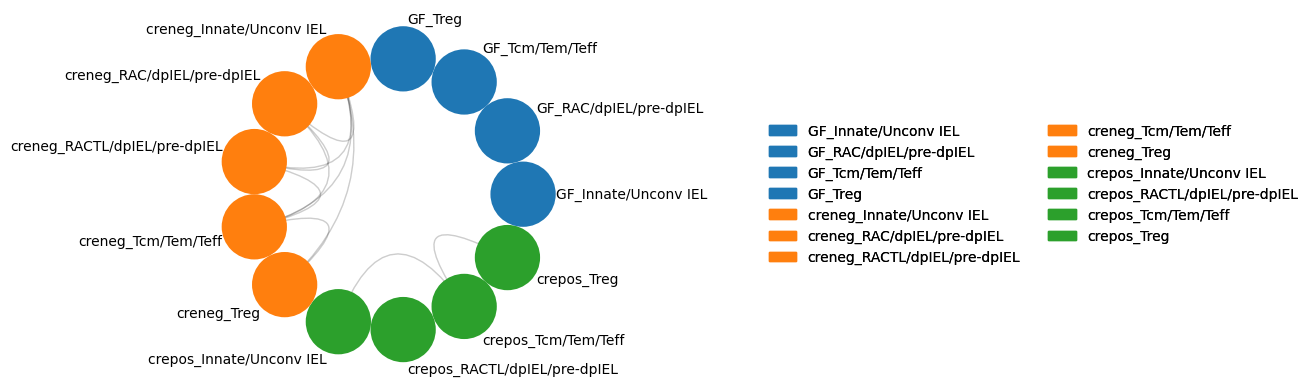

In [15]:
ddl.tl.clone_overlap(tdata2, groupby="group_celltype-fine_grouped")
ddl.pl.clone_overlap(
    tdata2,
    groupby="group_celltype-fine_grouped",
    color_mapping={
        "GF_Innate/Unconv IEL": "#1f77b4",
        "GF_RAC/dpIEL/pre-dpIEL": "#1f77b4",
        "GF_Tcm/Tem/Teff": "#1f77b4",
        "GF_Treg": "#1f77b4",
        "creneg_Innate/Unconv IEL": "#ff7f0e",
        "creneg_RAC/dpIEL/pre-dpIEL": "#ff7f0e",
        "creneg_RACTL/dpIEL/pre-dpIEL": "#ff7f0e",
        "creneg_Tcm/Tem/Teff": "#ff7f0e",
        "creneg_Treg": "#ff7f0e",
        "crepos_Innate/Unconv IEL": "#2ca02c",
        "crepos_RACTL/dpIEL/pre-dpIEL": "#2ca02c",
        "crepos_Tcm/Tem/Teff": "#2ca02c",
        "crepos_Treg": "#2ca02c",
    },
    legend_kwargs={
        "ncol": 2,
        "bbox_to_anchor": (1.5, 0.5),
        "frameon": False,
        "loc": "center left",
    },
)
plt.savefig(
    "figures/clonal_overlap_circle_plot_300823.pdf",
)

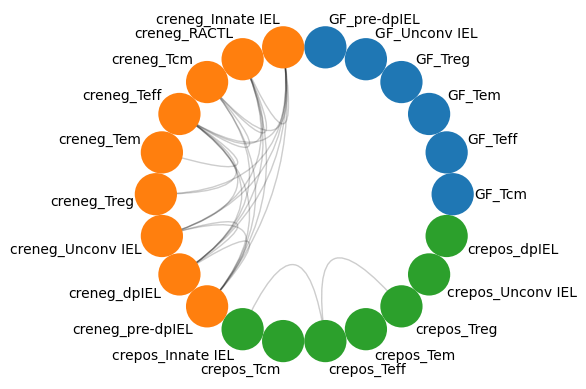

In [16]:
ddl.tl.clone_overlap(tdata2, groupby="group_celltype-fine")
ddl.pl.clone_overlap(
    tdata2,
    groupby="group_celltype-fine",
    color_mapping=grp_col,
    legend_kwargs={
        "ncol": 2,
        "bbox_to_anchor": (1.5, 0.5),
        "frameon": False,
        "loc": "center left",
    },
)
plt.savefig(
    "figures/clonal_overlap_circle_plot_310823.pdf",
)

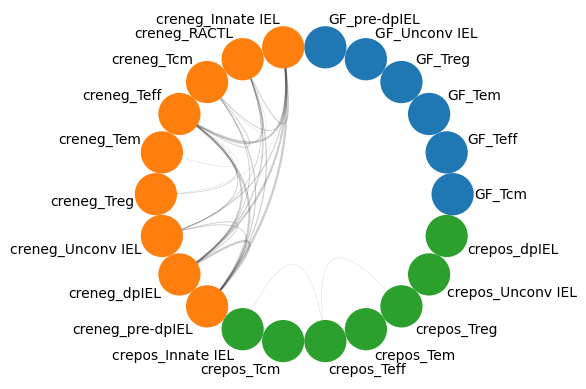

In [18]:
import numpy as np

ddl.tl.clone_overlap(tdata2, groupby="group_celltype-fine")
ddl.pl.clone_overlap(
    tdata2,
    groupby="group_celltype-fine",
    weighted_overlap=True,
    color_mapping=grp_col,
    legend_kwargs={
        "ncol": 2,
        "bbox_to_anchor": (1.5, 0.5),
        "frameon": False,
        "loc": "center left",
    },
    scale_edge_lambda=lambda x: np.log10(x) * 0.8,
)

## Frequency tables

In [1]:
import scanpy as sc

sc.logging.print_header()

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/homebrew/Caskroom/mambaforg

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.24.4 scipy==1.11.2 pandas==2.1.0 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10


/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [2]:
adata = sc.read_h5ad("write/adata_with_tcr_tnk_300823_with_tcr.h5ad")
try:
    adata.uns.pop("log1p")  # why do i have to do this?
except:
    pass
adata

AnnData object with n_obs × n_vars = 5546 × 2558
    obs: 'sample_id', 'sample_num', 'group', 'tissue', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ig', 'pct_counts_ig', 'leiden', 'filter_rna', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_abT_VDJ_main', 'd_call_ab

In [3]:
import os

os.makedirs("frequency_spreadsheets", exist_ok=True)

In [4]:
import pandas as pd

# percentage of cells from group
df = pd.crosstab(adata.obs["celltype-fine"], adata.obs["group"]).apply(
    lambda r: r / r.sum() * 100, axis=0
)
df.to_csv("frequency_spreadsheets/percent_celltypes_per_group.csv")
df

group,GF,creneg,crepos
celltype-fine,,,
Innate IEL,16.363636,18.269977,4.776119
RACTL,0.000000,0.349108,0.000000
Tcm,23.636364,8.766486,19.104478
Teff,9.090909,12.315749,42.686567
Tem,7.272727,1.764934,2.686567
Treg,29.090909,8.029480,29.552239
Unconv IEL,12.727273,3.297130,0.597015
dpIEL,0.000000,28.141971,0.298507
pre-dpIEL,1.818182,19.065167,0.298507


In [5]:
df = pd.crosstab(adata.obs["celltype-fine"], adata.obs["group"])
df.to_csv("frequency_spreadsheets/frequency_celltypes_per_group.csv")
df

group,GF,creneg,crepos
celltype-fine,,,
Innate IEL,9,942,16
RACTL,0,18,0
Tcm,13,452,64
Teff,5,635,143
Tem,4,91,9
Treg,16,414,99
Unconv IEL,7,170,2
dpIEL,0,1451,1
pre-dpIEL,1,983,1


In [6]:
# subset to just cells with TCR info
tdata = adata[~adata.obs["chain_status"].isin(["No_contig"])].copy()
tdata

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/anndata/_core/anndata.py:1105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


AnnData object with n_obs × n_vars = 3746 × 2558
    obs: 'sample_id', 'sample_num', 'group', 'tissue', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ig', 'pct_counts_ig', 'leiden', 'filter_rna', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_abT_VDJ_main', 'd_call_ab

In [7]:
# percentage of cells from group and clone size
df = pd.crosstab(tdata.obs["clone_id_size_max_5"], tdata.obs["group"]).apply(
    lambda r: r / r.sum() * 100, axis=0
)
df.to_csv("frequency_spreadsheets/percent_clone_size_per_group.csv")
df

group,GF,creneg,crepos
clone_id_size_max_5,,,
1,100.0,32.002219,84.496124
2,0.0,5.435385,9.302326
3,0.0,3.078203,2.325581
4,0.0,1.747088,0.000000
>= 5,0.0,57.737105,3.875969


In [8]:
# frequency of cells from group and clone size
df = pd.crosstab(tdata.obs["clone_id_size_max_5"], tdata.obs["group"])
df.to_csv("frequency_spreadsheets/frequency_clone_size_per_group.csv")
df

group,GF,creneg,crepos
clone_id_size_max_5,,,
1,11,1154,109
2,0,196,12
3,0,111,3
4,0,63,0
>= 5,0,2082,5


In [9]:
# create a new column that encompases the celltype-fine and clone size
from tools import combine_two_categories

combine_two_categories(tdata, "clone_id_size_max_5", "celltype-fine")

In [10]:
# percentage of cells from group and clone size by celltype-fine_grouped
df = pd.crosstab(
    tdata.obs["clone_id_size_max_5_celltype-fine"], adata.obs["group"]
).apply(lambda r: r / r.sum() * 100, axis=0)
df.to_csv("frequency_spreadsheets/percent_clone_size_per_group_by_celltype.csv")
df

group,GF,creneg,crepos
clone_id_size_max_5_celltype-fine,,,
1_Innate IEL,0.000000,2.495840,2.325581
1_RACTL,0.000000,0.083195,0.000000
1_Tcm,18.181818,8.402662,14.728682
1_Teff,18.181818,7.182474,36.434109
1_Tem,9.090909,1.996672,4.651163
1_Treg,27.272727,5.518580,24.806202
1_Unconv IEL,18.181818,1.996672,0.775194
1_dpIEL,0.000000,1.358846,0.775194
1_pre-dpIEL,9.090909,2.967277,0.000000


In [11]:
# frequency of cells from group and clone size by celltype-fine
df = pd.crosstab(tdata.obs["clone_id_size_max_5_celltype-fine"], adata.obs["group"])
df.to_csv("frequency_spreadsheets/frequency_clone_size_per_group_by_celltype.csv")
df

group,GF,creneg,crepos
clone_id_size_max_5_celltype-fine,,,
1_Innate IEL,0,90,3
1_RACTL,0,3,0
1_Tcm,2,303,19
1_Teff,2,259,47
1_Tem,1,72,6
1_Treg,3,199,32
1_Unconv IEL,2,72,1
1_dpIEL,0,49,1
1_pre-dpIEL,1,107,0


## DEG tables

In [12]:
cdata = adata[adata.obs["group"].isin(["crepos", "creneg"])].copy()
cdata

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/anndata/_core/anndata.py:1105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


AnnData object with n_obs × n_vars = 5491 × 2558
    obs: 'sample_id', 'sample_num', 'group', 'tissue', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ig', 'pct_counts_ig', 'leiden', 'filter_rna', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_abT_VDJ_main', 'd_call_ab

In [13]:
cdata.obs["group"].cat.categories

Index(['creneg', 'crepos'], dtype='object')

In [14]:
from tqdm import tqdm
from tools import exportDEres

In [15]:
import os

out_path = "deg_spreadsheets/leiden_T"
os.makedirs(out_path, exist_ok=True)

In [16]:
for i in tqdm(list(set(cdata.obs["leiden_T"]))):
    try:
        tmp = cdata[cdata.obs["leiden_T"] == i].copy()
        sc.tl.rank_genes_groups(tmp, groupby="group", method="wilcoxon")
        ### give this to virginia
        exportDEres(
            tmp, column="creneg", filename=f"{out_path}/leiden_T_{i}_creneg_DE.tsv"
        )
        exportDEres(
            tmp, column="crepos", filename=f"{out_path}/leiden_T_{i}_crepos_DE.tsv"
        )
    except:
        pass

  0%|          | 0/13 [00:00<?, ?it/s]

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
  8%|▊         | 1/13 [00:00<00:06,  1.97it/s]/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/anndata/_core/anndata.py:1105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
 15%|█▌        | 2/13 [00:00<00:02,  3.71it/s]/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/anndata/_core/anndata.py:1105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categoric

In [17]:
out_path = "deg_spreadsheets/celltype-fine"
os.makedirs(out_path, exist_ok=True)

In [18]:
for i in tqdm(list(set(cdata.obs["celltype-fine"]))):
    try:
        tmp = cdata[cdata.obs["celltype-fine"] == i].copy()
        sc.tl.rank_genes_groups(tmp, groupby="group", method="wilcoxon")
        ### give this to virginia
        exportDEres(
            tmp, column="creneg", filename=f"{out_path}/celltype-fine_{i}_creneg_DE.tsv"
        )
        exportDEres(
            tmp, column="crepos", filename=f"{out_path}/celltype-fine_{i}_crepos_DE.tsv"
        )
    except:
        pass

  0%|          | 0/9 [00:00<?, ?it/s]/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/anndata/_core/anndata.py:1105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
 11%|█         | 1/9 [00:00<00:03,  2.22it/s]/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/anndata/_core/anndata.py:1105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i